# Input data

Text(0, 0.5, 'Second feature')

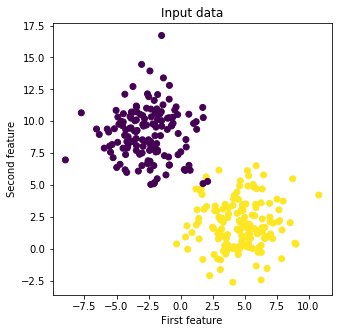

In [71]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network using Keras

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units=3, input_dim=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) 
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Neural network training

In [80]:
history = model.fit(X_train, y_train,
                    batch_size=30,
                    epochs=100,
                    validation_data=(X_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 0s 362us/step - loss: 0.6776 - accuracy: 0.4978 - val_loss: 0.6682 - val_accuracy: 0.5067
Epoch 2/100
225/225 [==============================] - 0s 71us/step - loss: 0.6651 - accuracy: 0.4978 - val_loss: 0.6554 - val_accuracy: 0.5067
Epoch 3/100
225/225 [==============================] - 0s 76us/step - loss: 0.6524 - accuracy: 0.4978 - val_loss: 0.6438 - val_accuracy: 0.5067
Epoch 4/100
225/225 [==============================] - 0s 80us/step - loss: 0.6410 - accuracy: 0.4978 - val_loss: 0.6324 - val_accuracy: 0.5067
Epoch 5/100
225/225 [==============================] - 0s 71us/step - loss: 0.6299 - accuracy: 0.4978 - val_loss: 0.6217 - val_accuracy: 0.5067
Epoch 6/100
225/225 [==============================] - 0s 62us/step - loss: 0.6194 - accuracy: 0.4978 - val_loss: 0.6116 - val_accuracy: 0.5067
Epoch 7/100
225/225 [==============================] - 0s 80us/step - loss: 0.6096 - accur

# Accuracy and loss

Final train accuracy: 99.11 %
Final test accuracy: 97.33 %


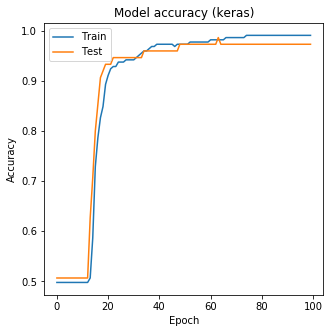

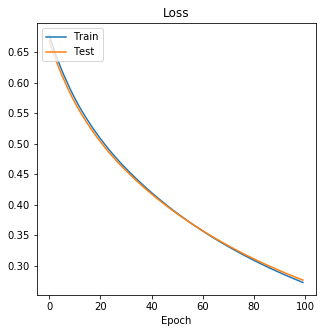

In [92]:
import matplotlib.pyplot as plt

print("Final train accuracy: {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Final test accuracy: {:.2f} %".format(history.history['val_accuracy'][-1]*100))

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy (keras)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Results

Text(0, 0.5, 'Second feature')

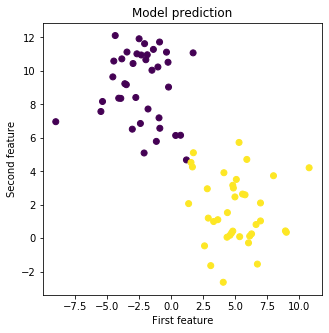

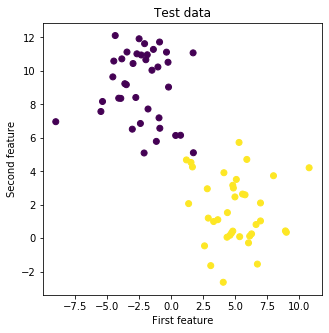

In [88]:
y_pred = model.predict(X_test)
y_classes = y_pred >= 0.5
y_classes = y_classes[:,0]

plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_classes)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Comparative analysis keras-model and handmade-model
After testing both model give the same results.

Keras model: 99.11% - on train, 97.33% - on test

Numpy model: 99.11% - on train, 97.33% - on test

Graphs of accuracy changes in the learning process are presented below

# 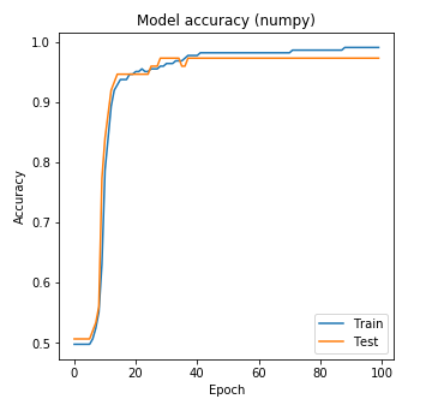

# 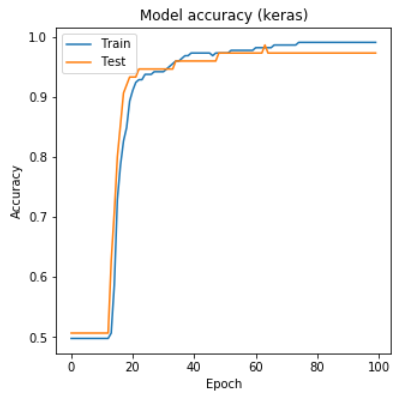

As we see accuracy in the learning process was achieved in various ways, as evidenced by differences in the graphs. The reason for this is various random weights in the first stage.